In [1]:
# Configurar el estilo de fuente global a 'serif'
from astroquery.vizier import Vizier
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman', 'DejaVu Serif', 'Bitstream Vera Serif', 'Computer Modern Roman', 'New Century Schoolbook', 'Century Schoolbook L', 'Utopia', 'ITC Bookman', 'Bookman', 'Nimbus Roman No9 L', 'Palatino', 'Charter', 'serif']

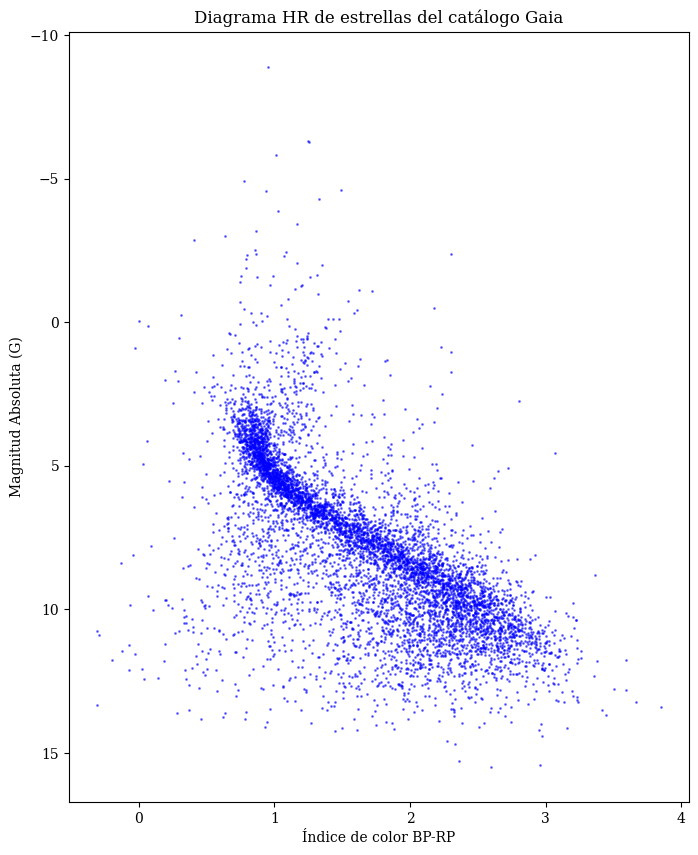

In [2]:


# Establecer un límite en la cantidad de filas que se pueden descargar
Vizier.ROW_LIMIT = 10000

# Buscar en el catálogo Gaia DR3 (I/350/gaiaedr3)
catalog = "I/350/gaiaedr3"
result = Vizier.query_constraints(catalog=catalog)

# Extraer las columnas relevantes (magnitudes G, BP, RP y la paralaje)
data = result[0]
G = data['Gmag']       # Magnitud en banda G (Gaia)
BP = data['BPmag']     # Magnitud en banda BP (Gaia)
RP = data['RPmag']     # Magnitud en banda RP (Gaia)
parallax = data['Plx']  # Paralaje en milisegundos de arco

# Filtrar datos con paralaje > 0
valid = parallax > 0
G = G[valid]
BP = BP[valid]
RP = RP[valid]
parallax = parallax[valid]

# Calcular el índice de color BP-RP
BP_RP = BP - RP

# Convertir la paralaje en distancia en parsecs
distance_pc = 1000 / parallax

# Calcular la magnitud absoluta usando la fórmula de distancia
# M = m - 5 * log10(d/10)
abs_mag = G - 5 * np.log10(distance_pc / 10)

# Crear el diagrama HR
plt.figure(figsize=(8, 10))
plt.scatter(BP_RP, abs_mag, color='blue', s=1, alpha=0.5)
plt.gca().invert_yaxis()  # Invertir el eje Y para que las estrellas más brillantes estén arriba
plt.xlabel('Índice de color BP-RP')
plt.ylabel('Magnitud Absoluta (G)')
plt.title('Diagrama HR de estrellas del catálogo Gaia')
plt.show()


In [3]:
%matplotlib inline

from __future__ import division

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Generar un cuadro con versiones de las librerías utilizadas en este notebook
#https://github.com/jrjohansson/version_information


In [4]:
filename = 'asu.tsv'
df = pd.read_table(filename, skiprows=44, sep=';', header=None, index_col=0,
                   names = ['HIP', 'Vmag', 'Plx', 'B-V', 'SpType'],
                   skipfooter=1, engine='python')

In [5]:
df.describe()

,Vmag,Plx,B-V,SpType
count,118209,118209,118209,115175
unique,1127,5617,2437,4123
top,8.69,,,K0
freq,504,263,1281,8570


In [6]:
df_clean = df.apply(lambda x: x.map(lambda y: np.nan if isinstance(y, str) and y.isspace() else y))

In [7]:
df_clean

,Vmag,Plx,B-V,SpType
HIP,,,,
10,8.59,10.76,0.489,F6V
11,7.34,4.29,0.081,A2
12,8.43,4.06,1.484,K4III
13,8.80,3.49,1.128,K0III
14,7.25,5.11,1.200,K0
...,...,...,...,...
118318,6.99,1.92,1.595,K2
118319,8.23,10.63,0.639,G2V
118320,7.59,5.00,0.999,K0


In [8]:
df_clean.describe()

,Vmag,Plx,B-V,SpType
count,118208,117946,116928,115175
unique,1126,5616,2436,4123
top,8.69,2.93,1.000,K0
freq,504,183,317,8570


In [9]:
df_clean= df_clean.dropna()
df_clean.describe()

,Vmag,Plx,B-V,SpType
count,114463,114463,114463,114463
unique,1072,5361,2426,4069
top,8.69,2.93,1.000,K0
freq,502,182,308,8537


In [10]:
df_clean.shape

(114463, 4)

In [11]:
df_clean['Vmag'] = df_clean['Vmag'].astype(float)
df_clean['Plx'] = df_clean['Plx'].astype(float)
df_clean['B-V'] = df_clean['B-V'].astype(float)
df_clean['M_V'] = df_clean['Vmag'] + 5 * np.log10(df_clean['Plx']/100.)
df_clean.head()

/tmp/ipykernel_5684/1527072661.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Vmag'] = df_clean['Vmag'].astype(float)
/tmp/ipykernel_5684/1527072661.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Plx'] = df_clean['Plx'].astype(float)
/tmp/ipykernel_5684/1527072661.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.or

,Vmag,Plx,B-V,SpType,M_V
HIP,,,,,
10,8.59,10.76,0.489,F6V,3.749061
11,7.34,4.29,0.081,A2,0.502286
12,8.43,4.06,1.484,K4III,1.472630
13,8.80,3.49,1.128,K0III,1.514127
14,7.25,5.11,1.200,K0,0.792105


In [12]:

# Se eliminan las filas que no cumplen la condición alfa + num
f = lambda s: (len(s) >= 2)  and (s[0].isalpha()) and (s[1].isdigit())
i  = df_clean['SpType'].apply(f)
df_clean = df_clean[i]

# Se crea una columna nueva con los dos primeros caracteres de 'SpType'
f = lambda s: s[0:2]
df_clean['SpType2'] = df_clean['SpType'].apply(f)

In [13]:
df_clean.shape

(111553, 6)

In [14]:
df_clean.head()

,Vmag,Plx,B-V,SpType,M_V,SpType2
HIP,,,,,,
10,8.59,10.76,0.489,F6V,3.749061,F6
11,7.34,4.29,0.081,A2,0.502286,A2
12,8.43,4.06,1.484,K4III,1.472630,K4
13,8.80,3.49,1.128,K0III,1.514127,K0
14,7.25,5.11,1.200,K0,0.792105,K0


In [15]:
f = lambda s: s[0]
clases = df_clean['SpType'].map(f)
clases.value_counts()

SpType
K    31577
F    25199
G    22210
A    17651
B    10280
M     4210
O      256
C       82
N       48
R       23
S       17
Name: count, dtype: int64

In [16]:
f = lambda s: s[0] in 'OBAFGKM'
df_clean = df_clean[df_clean['SpType'].map(f)]

In [17]:
f = lambda s: s[0]
clases = df_clean['SpType'].map(f)
clases.value_counts()

SpType
K    31577
F    25199
G    22210
A    17651
B    10280
M     4210
O      256
Name: count, dtype: int64

In [18]:
orden = {'O':'0', 'B':'1', 'A':'2', 'F':'3', 'G':'4', 'K':'5', 'M':'6'}
f = lambda s: orden[s[0]]+s[1]
df_clean['SpType2'] = df_clean['SpType2'].apply(f)
df_clean.head()

,Vmag,Plx,B-V,SpType,M_V,SpType2
HIP,,,,,,
10,8.59,10.76,0.489,F6V,3.749061,36
11,7.34,4.29,0.081,A2,0.502286,22
12,8.43,4.06,1.484,K4III,1.472630,54
13,8.80,3.49,1.128,K0III,1.514127,50
14,7.25,5.11,1.200,K0,0.792105,50


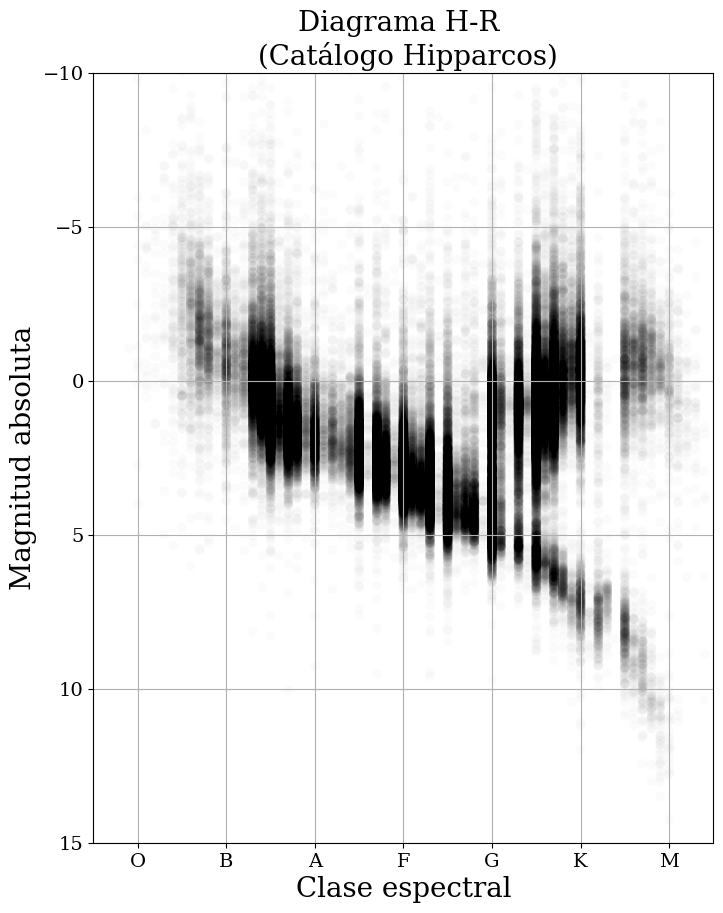

In [19]:
fig, ax = plt.subplots(figsize=(8,10))

ax.set_xlim(0, 70)
ax.set_ylim(15, -10)
ax.grid()
ax.set_title(u'Diagrama H-R \n (Catálogo Hipparcos)')

ax.title.set_fontsize(20)
ax.set_xlabel('Clase espectral')
ax.xaxis.label.set_fontsize(20)
ax.set_ylabel('Magnitud absoluta')
ax.yaxis.label.set_fontsize(20)

ax.scatter(df_clean['SpType2'].astype(int), df_clean['M_V'],
           s=50, edgecolors='none', alpha=0.015, c='k')
ax.set_xticks(range(5,75,10))
ax.set_xticklabels(['O', 'B', 'A', 'F', 'G', 'K', 'M'])
ax.tick_params(axis='both', labelsize=14)

In [20]:
# Lee el archivo de texto y crea un DataFrame
nombres_columnas = ['Estrella', 'TYC', '2MASS']
data = pd.read_csv('Nombres_de_Estrellas.txt', delimiter=' ', names=nombres_columnas, header=None)  # Si el archivo está tabulado, usa '\t' como separador
data

,Estrella,TYC,2MASS
0,Krich_1,TYC22-591-1,2MASSJ01030596+0434459
1,Krich_2,TYC26-777-1,2MASSJ01194936+0634115
2,Na_rich,TYC6908-1643-1,2MASSJ20320320-2332524
3,Nrich_1,TYC4686-2039-1,2MASSJ01575297-0316508
4,Nrich_2,TYC8517-1671-1,2MASSJ05120630-5913438
5,Nrich_3,TYC244-273-1,2MASSJ10022398+0216045
6,Nrich_4,TYC250-1352-1,2MASSJ10071742+0605101
7,Nrich_5,TYC269-474-1,2MASSJ11173689+0645217
8,Nrich_6,TYC7408-694-1,2MASSJ18461977-3021506
9,Nrich_7,TYC5256-183-1,2MASSJ23513172-0312308


In [21]:
data["Bmag"] = [12.21,10.79,11.2,12.273,11.587,11.76,12.90,11.75,12.28,12.188,12.360,11.56,9.30]
data["Vmag"] = [10.95,9.76,10.4,11.204,10.701,10.65,11.41,10.73,11.04,10.689,11.400,10.62,8.40]
data["B-V"] = data["Bmag"] - data["Vmag"]
data["Plx"] = [1.406, 1.7244, 0.4702,0.428,	0.9221,0.3789,0.1543,1.1027,0.2488,0.3263,0.7111,0.6307,2.0975]
data["SpType"] = ["Nan","G5","Nan","Nan","Nan","Nan","Nan","Nan","Nan","Nan","Nan","Nan","CEMP-s"]
data['M_V'] = data['Vmag'] + 5 * np.log10(data['Plx']/100.)
data

,Estrella,TYC,2MASS,Bmag,Vmag,B-V,Plx,SpType,M_V
0,Krich_1,TYC22-591-1,2MASSJ01030596+0434459,12.210,10.950,1.260,1.4060,Nan,1.689927
1,Krich_2,TYC26-777-1,2MASSJ01194936+0634115,10.790,9.760,1.030,1.7244,G5,0.943190
2,Na_rich,TYC6908-1643-1,2MASSJ20320320-2332524,11.200,10.400,0.800,0.4702,Nan,-1.238587
3,Nrich_1,TYC4686-2039-1,2MASSJ01575297-0316508,12.273,11.204,1.069,0.4280,Nan,-0.638781
4,Nrich_2,TYC8517-1671-1,2MASSJ05120630-5913438,11.587,10.701,0.886,0.9221,Nan,0.524890
5,Nrich_3,TYC244-273-1,2MASSJ10022398+0216045,11.760,10.650,1.110,0.3789,Nan,-1.457377
6,Nrich_4,TYC250-1352-1,2MASSJ10071742+0605101,12.900,11.410,1.490,0.1543,Nan,-2.648170
7,Nrich_5,TYC269-474-1,2MASSJ11173689+0645217,11.750,10.730,1.020,1.1027,Nan,0.942287
8,Nrich_6,TYC7408-694-1,2MASSJ18461977-3021506,12.280,11.040,1.240,0.2488,Nan,-1.980748
9,Nrich_7,TYC5256-183-1,2MASSJ23513172-0312308,12.188,10.689,1.499,0.3263,Nan,-1.742915


In [22]:
# Forma de llamar colores, de la paleta de colores
cmap = plt.get_cmap('plasma')
colors = [cmap(i) for i in np.linspace(0, 1, len(data["Estrella"].unique()))]


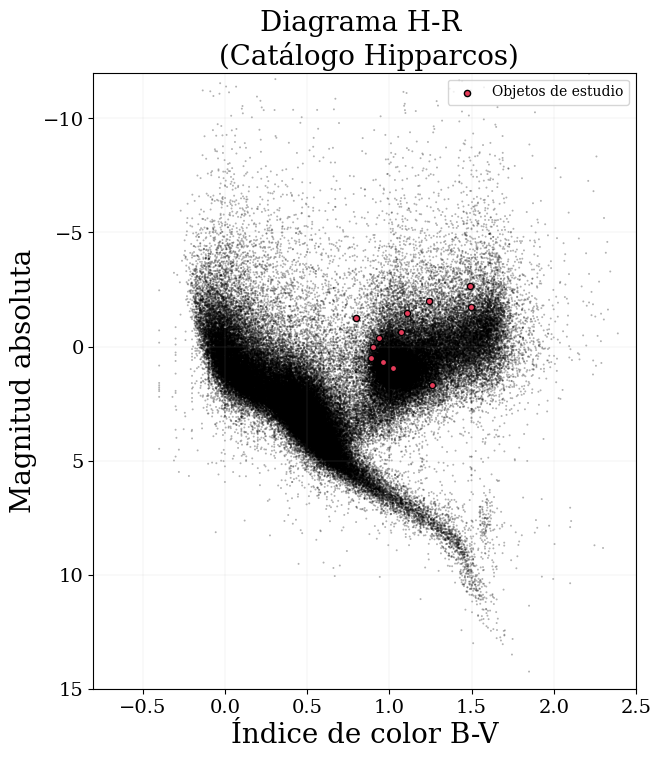

In [23]:
fig, ax = plt.subplots(figsize=(7,8))

ax.set_xlim(-0.8, 2.5)
ax.set_ylim(15, -12)
ax.grid(linestyle='-', linewidth=0.1)
ax.set_title('Diagrama H-R \n (Catálogo Hipparcos)',fontsize = 14)

ax.title.set_fontsize(20)
ax.set_xlabel('Índice de color B-V',fontsize = 12)
ax.xaxis.label.set_fontsize(20)
ax.set_ylabel('Magnitud absoluta',fontsize = 12)
ax.yaxis.label.set_fontsize(20)

ax.scatter(df_clean['B-V'], df_clean['M_V'],
#           s=50, edgecolors='none', alpha=0.015, c='k')
           s=2, edgecolors='none', alpha = 0.3, c='k')

ax.scatter(data['B-V'], data['M_V'],
        s=20, edgecolors='k', alpha=1, color="#e53b59", label = "Objetos de estudio")

ax.tick_params(axis='both', labelsize=14)
ax.legend(loc = "upper right")

In [24]:
f = lambda s: 'VII' in s
b = df_clean['SpType'].map(f)
print("Clase VII: enanas blancas, hay %d estrellas" %sum(b))

f = lambda s: ('VI' in s) and ('VII' not in s)
b = df_clean['SpType'].map(f)
print("Clase VI: subenanas, hay %d estrellas" %sum(b))

f = lambda s: ('V' in s) and ('VI' not in s) and ('IV' not in s)
b = df_clean['SpType'].map(f)
print("Clase V: secuencia principal, hay %d estrellas" %sum(b))

f = lambda s: 'IV' in s
b = df_clean['SpType'].map(f)
print("Clase IV: subgigantes, hay %d estrellas" %sum(b))

f = lambda s: 'III' in s
b = df_clean['SpType'].map(f)
print("Clase III: gigantes, hay %d estrellas" %sum(b))

f = lambda s: ('II' in s) and ('III' not in s) and ('VII' not in s)
b = df_clean['SpType'].map(f)
print("Clase II: gigantes brillantes, hay %d estrellas" %sum(b))

f = lambda s: ('I' in s) and ('II' not in s) and ('V' not in s)
b = df_clean['SpType'].map(f)
print("Clase I: supergigantes, hay %d estrellas" %sum(b))

Clase VII: enanas blancas, hay 1 estrellas
Clase VI: subenanas, hay 16 estrellas
Clase V: secuencia principal, hay 24680 estrellas
Clase IV: subgigantes, hay 7955 estrellas
Clase III: gigantes, hay 22518 estrellas
Clase II: gigantes brillantes, hay 1239 estrellas
Clase I: supergigantes, hay 937 estrellas


In [25]:
f = lambda s: ('I' not in s) and ('V' not in s)
b = df_clean['SpType'].map(f)
print(sum(b))

55600


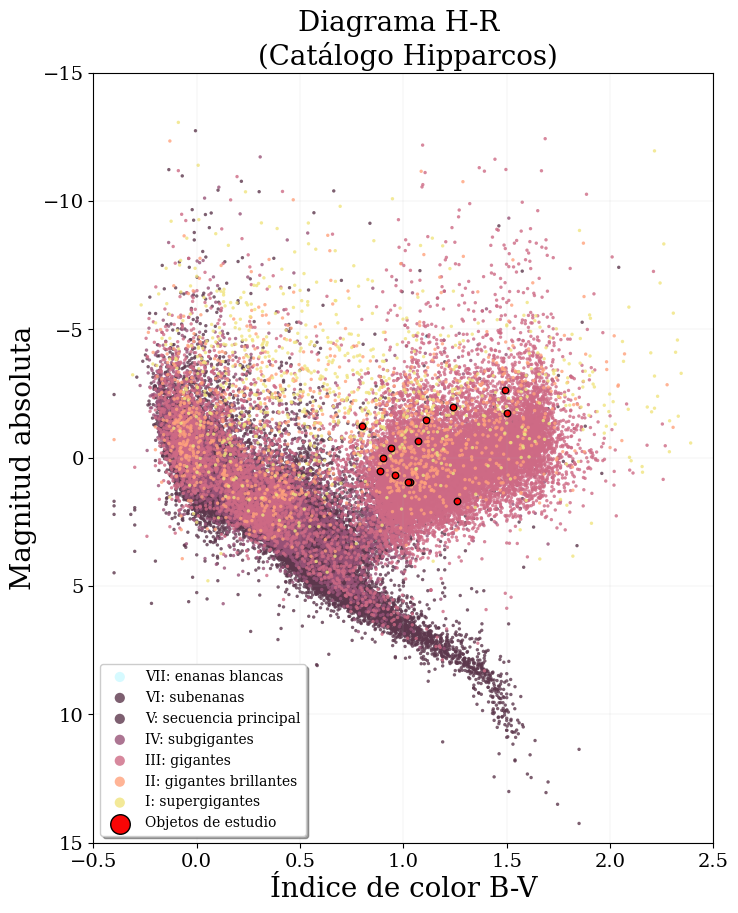

In [46]:
def plot_lum_class(b,c, label):
    ''' b: Series booleana para hacer la selección
        c: Color
        label: etiqueta para la leyenda
    '''
    x = df_clean['B-V'][b]
    y = df_clean['M_V'][b]
    ax.scatter(x, y, color = c, s=6, edgecolors='none', alpha = 0.8, label = label)

fig = plt.figure(figsize=(8,10))
ax = fig.add_subplot(111, facecolor='1')

ax.set_xlim(-0.5, 2.5)
ax.set_ylim(15, -15)
ax.grid(linestyle='-', linewidth=0.1)
ax.set_title(u'Diagrama H-R \n (Catálogo Hipparcos)')

ax.title.set_fontsize(20)
ax.set_xlabel(u'Índice de color B-V')
ax.xaxis.label.set_fontsize(20)
ax.set_ylabel('Magnitud absoluta')
ax.yaxis.label.set_fontsize(20)

f = lambda s: 'VII' in s
b = df_clean['SpType'].map(f)
plot_lum_class(b,'#ccf9ff', 'VII: enanas blancas')

f = lambda s: ('VI' in s) and ('VII' not in s)
b = df_clean['SpType'].map(f)
plot_lum_class(b,'#5c374c', 'VI: subenanas')

f = lambda s: ('V' in s) and ('VI' not in s) and ('IV' not in s)
b = df_clean['SpType'].map(f)
plot_lum_class(b,'#5c374c', 'V: secuencia principal')

f = lambda s: 'IV' in s
b = df_clean['SpType'].map(f)
plot_lum_class(b,'#985277', 'IV: subgigantes')

f = lambda s: 'III' in s
b = df_clean['SpType'].map(f)
plot_lum_class(b,'#ce6a85', 'III: gigantes')

f = lambda s: ('II' in s) and ('III' not in s) and ('VII' not in s)
b = df_clean['SpType'].map(f)
plot_lum_class(b,'#ffa27c', 'II: gigantes brillantes')

# #ff8c61

f = lambda s: ('I' in s) and ('II' not in s) and ('V' not in s)
b = df_clean['SpType'].map(f)
plot_lum_class(b,'#f0e47e', 'I: supergigantes')

ax.scatter(data['B-V'], data['M_V'],
        s=22, edgecolors='k', alpha=1, color="#f80606", label = "Objetos de estudio")

ax.tick_params(axis='both', labelsize=14)
legend = ax.legend(scatterpoints=1,markerscale = 3, shadow=True)
frame = legend.get_frame()
frame.set_facecolor('1')

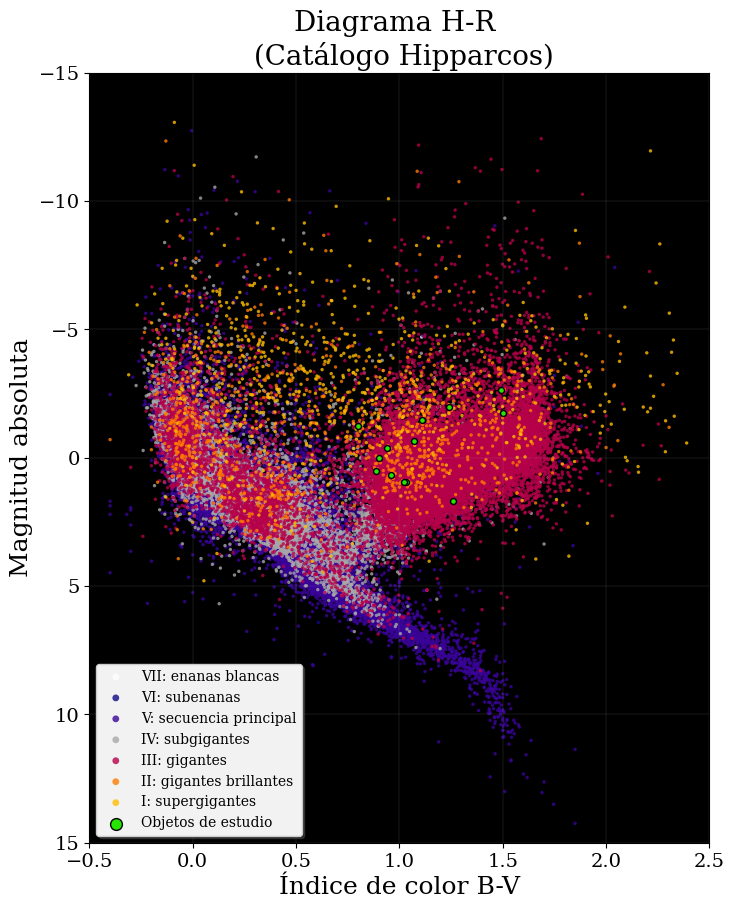

In [32]:
def plot_lum_class(b,c, label):
    ''' b: Series booleana para hacer la selección
        c: Color
        label: etiqueta para la leyenda
    '''
    x = df_clean['B-V'][b]
    y = df_clean['M_V'][b]
    ax.scatter(x, y, color = c, s=6, edgecolors='none', alpha = 0.8, label = label)

fig = plt.figure(figsize=(8,10))
ax = fig.add_subplot(111, facecolor='0')

ax.set_xlim(-0.5, 2.5)
ax.set_ylim(15, -15)
ax.grid(linestyle='-', linewidth=0.1)
ax.set_title(u'Diagrama H-R \n (Catálogo Hipparcos)')

ax.title.set_fontsize(20)
ax.set_xlabel(u'Índice de color B-V')
ax.xaxis.label.set_fontsize(18)
ax.set_ylabel('Magnitud absoluta')
ax.yaxis.label.set_fontsize(18)

f = lambda s: 'VII' in s
b = df_clean['SpType'].map(f)
plot_lum_class(b,'white', 'VII: enanas blancas')

f = lambda s: ('VI' in s) and ('VII' not in s)
b = df_clean['SpType'].map(f)
plot_lum_class(b,colors[0], 'VI: subenanas')

f = lambda s: ('V' in s) and ('VI' not in s) and ('IV' not in s)
b = df_clean['SpType'].map(f)
plot_lum_class(b,colors[1], 'V: secuencia principal')

f = lambda s: 'IV' in s
b = df_clean['SpType'].map(f)
plot_lum_class(b,'#a8a8a8', 'IV: subgigantes')

f = lambda s: 'III' in s
b = df_clean['SpType'].map(f)
plot_lum_class(b,'#b6004a', 'III: gigantes')

f = lambda s: ('II' in s) and ('III' not in s) and ('VII' not in s)
b = df_clean['SpType'].map(f)
plot_lum_class(b,'#ff7c00', 'II: gigantes brillantes')

f = lambda s: ('I' in s) and ('II' not in s) and ('V' not in s)
b = df_clean['SpType'].map(f)
plot_lum_class(b,'#ffbd00', 'I: supergigantes')

ax.scatter(data['B-V'], data['M_V'],
        s=18, edgecolors='k', alpha=1, color="#26e500", label = "Objetos de estudio")

ax.tick_params(axis='both', labelsize=14)
legend = ax.legend(scatterpoints=1,markerscale = 2, shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.95')